<a href="https://colab.research.google.com/github/Boa1120/Stats-_student/blob/main/pablo_Gamboa__Stats_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# STA 2023 Final Project
## Directions:

1) Replace the image dataset in the google slides with your own data.

2) Comment and explain all code to the best of your ability.

3) Run your model 3 times. 

4) Report best, worst, and average of the three runs. 




Use any and all resources available to you.

Comment and explain the code.

Answer the questions to the best of your abilities.

If you have any questions, txt 561-479-8123

Save this notebook to your GitHub and submit the link on Canvas


In [1]:
%%capture
!pip install wandb
!apt-get install poppler-utils
!pip install pdf2image
!pip install flashtorch
import requests
from pdf2image import convert_from_path
import matplotlib.pyplot as plt
import numpy as np
import torch
import requests
from torchvision import *
from torchvision.models import *
from flashtorch.utils import apply_transforms
import wandb as wb

Comment: The code below will allow me to upload the data form the slide doc to upload the image for the system to identify between the two images.

In [2]:
def GPU(data):
    return torch.tensor(data, requires_grad=True, dtype=torch.float, device=torch.device('cuda'))

def GPU_data(data):
    return torch.tensor(data, requires_grad=False, dtype=torch.float, device=torch.device('cuda'))

def plot(x):
    fig, ax = plt.subplots()
    im = ax.imshow(x, cmap = 'gray')
    ax.axis('off')
    fig.set_size_inches(5, 5)
    plt.show()
    
def get_google_slide(url):
    url_head = "https://docs.google.com/presentation/d/"
    url_body = url.split('/')[5]
    page_id = url.split('.')[-1]
    return url_head + url_body + "/export/pdf?id=" + url_body + "&pageid=" + page_id

def get_slides(url):
    url = get_google_slide(url)
    r = requests.get(url, allow_redirects=True)
    open('file.pdf', 'wb').write(r.content)
    images = convert_from_path('file.pdf', 500)
    return images

def load(image):

    return apply_transforms(image).clone().detach().requires_grad_(True).to(device)

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [3]:
labels = {int(key):value for (key, value) in requests.get('https://s3.amazonaws.com/mlpipes/pytorch-quick-start/labels.json').json().items()}

model = alexnet(weights='DEFAULT').to(device)
model.eval();

Downloading: "https://download.pytorch.org/models/alexnet-owt-7be5be79.pth" to /root/.cache/torch/hub/checkpoints/alexnet-owt-7be5be79.pth


  0%|          | 0.00/233M [00:00<?, ?B/s]

Comment: Below is where to upload the link to the slide doc.

Comment: The images below are to to set the data to define the difference between Real Madrid and Barcelona 

In [4]:
url = "https://docs.google.com/presentation/d/1lgUIjJ7tQSSMFQCl_NYCJsPzPGwMwNCPLtFdLzNuWMQ/edit#slide=id.p"

Comment: This code will show the images from the slide doc.

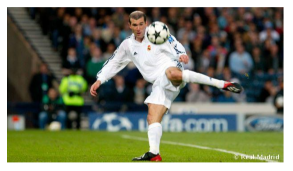

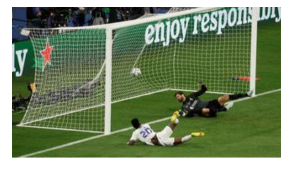

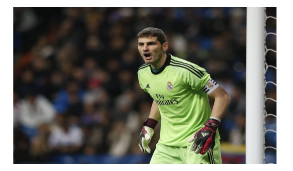

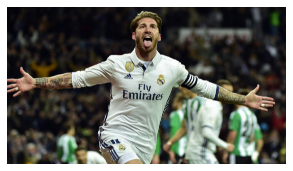

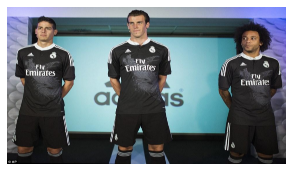

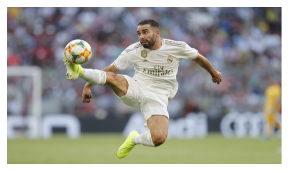

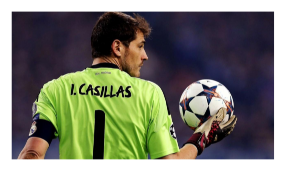

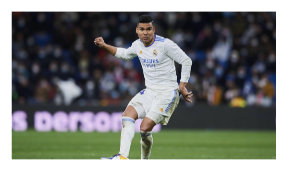

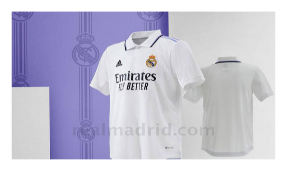

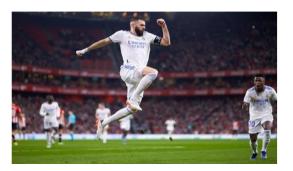

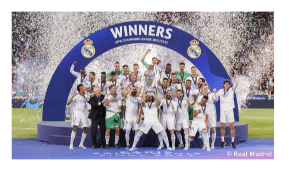

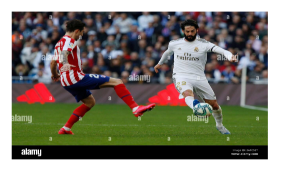

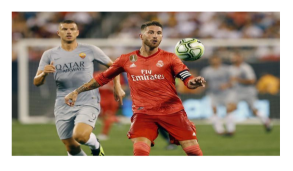

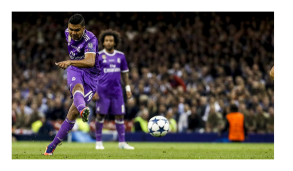

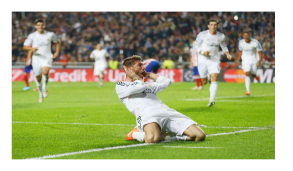

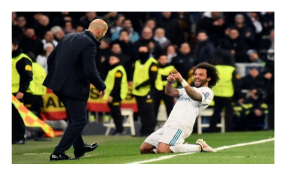

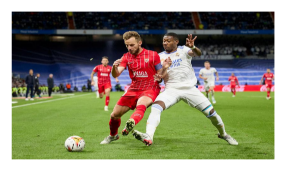

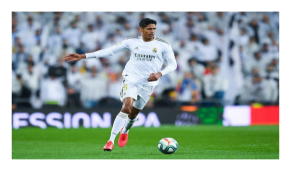

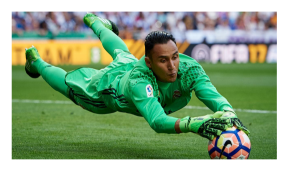

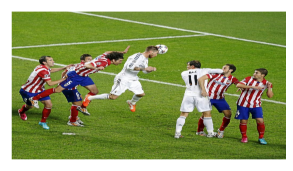

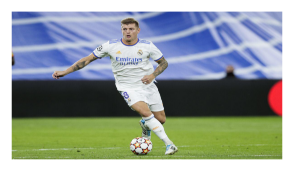

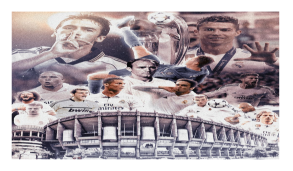

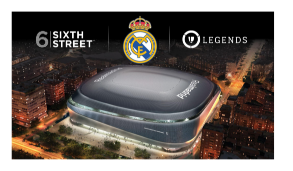

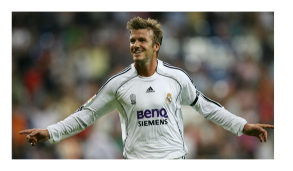

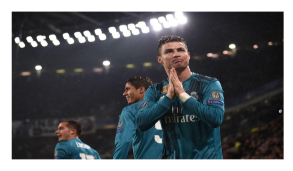

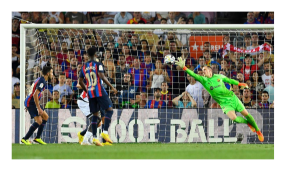

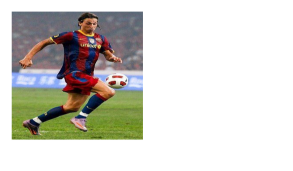

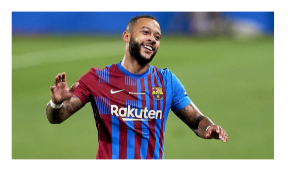

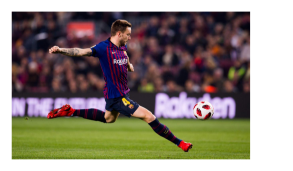

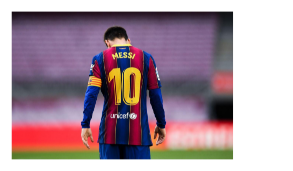

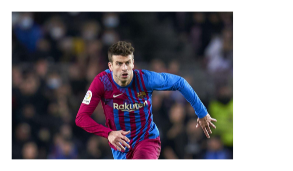

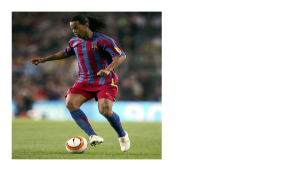

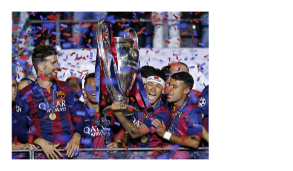

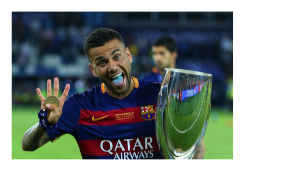

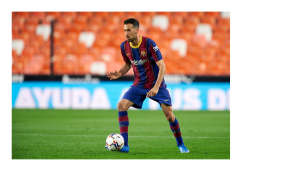

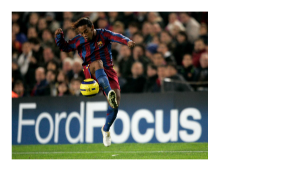

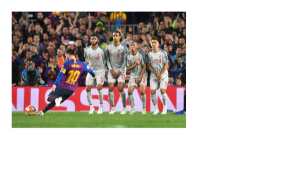

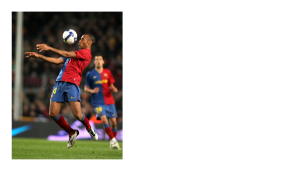

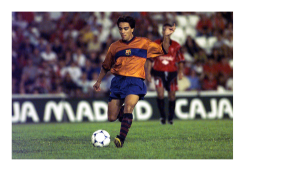

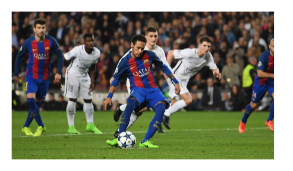

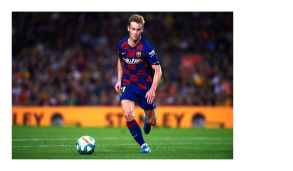

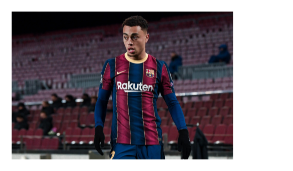

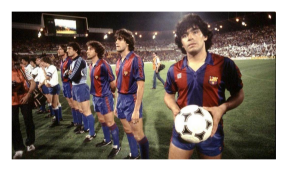

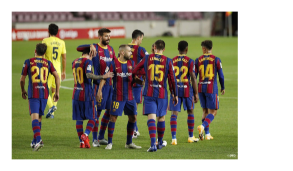

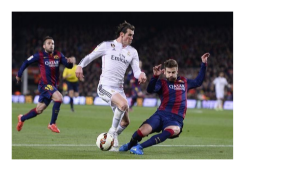

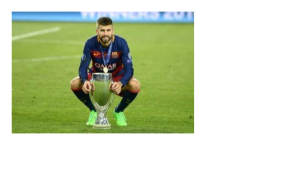

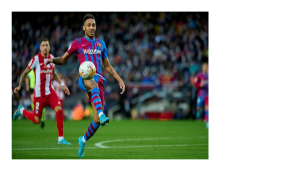

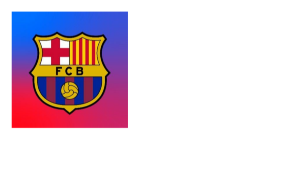

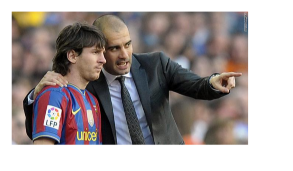

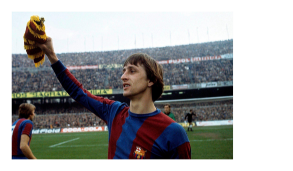

In [5]:
images = []

for image in get_slides(url):

    plot(image)

    images.append(load(image))

images = torch.vstack(images)

Comment: The following codes below are to set the values of the frames shapes and sizes.

Comment: The code below sets the sizeing and framing of the images.

In [6]:
images.shape

torch.Size([50, 3, 224, 224])

In [7]:
model(images)

tensor([[-5.9339, -3.1046, -3.4431,  ..., -6.2604,  4.4931,  3.8124],
        [-2.5099, -3.8910, -0.7325,  ..., -5.8029,  0.9301,  2.1424],
        [-1.1462, -3.6704, -2.7228,  ..., -2.0301,  2.5993,  2.0232],
        ...,
        [-2.7181, -1.6632, -3.4096,  ..., -3.4955,  1.8728,  2.9545],
        [-0.2302, -2.4098, -1.9318,  ..., -1.5220,  0.5598,  1.5818],
        [ 1.8781, -2.3479,  1.5536,  ..., -2.0179,  1.8701, -0.7086]],
       device='cuda:0', grad_fn=<AddmmBackward0>)

In [8]:
y = model(images)

In [9]:
y.shape

torch.Size([50, 1000])

In [10]:
guesses = torch.argmax(y, 1).cpu().numpy()

Comment: Here is where the system was supposed to identify the images which it failed to do. The closest guesses were soccerball and ballplayer.

In [11]:
for i in list(guesses):
    print(labels[i])

ballplayer, baseball player
scoreboard
rugby ball
basketball
barbell
tennis ball
ping-pong ball
ballplayer, baseball player
jersey, T-shirt, tee shirt
horizontal bar, high bar
web site, website, internet site, site
ballplayer, baseball player
ping-pong ball
football helmet
baseball
rugby ball
soccer ball
football helmet
rugby ball
ballplayer, baseball player
ballplayer, baseball player
web site, website, internet site, site
waffle iron
rugby ball
scoreboard
football helmet
croquet ball
baseball
soccer ball
soccer ball
ping-pong ball
rugby ball
shoe shop, shoe-shop, shoe store
ping-pong ball
football helmet
football helmet
web site, website, internet site, site
admiral
soccer ball
soccer ball
soccer ball
dogsled, dog sled, dog sleigh
soccer ball
unicycle, monocycle
soccer ball
parachute, chute
soccer ball
pinwheel
ping-pong ball
paddle, boat paddle


Comment: The code below is where it arranges the data set in with the values of zero.

In [12]:
Y = np.zeros(50,)
Y[25:] = 1

Comment: This is the data arrange set.

In [13]:
Y

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [14]:
X = y.detach().cpu().numpy() 

In [15]:
X.shape

(50, 1000)

Comment: The plot shows the random guesses made from the images and arranged them in the category shown in the list of guesses. 

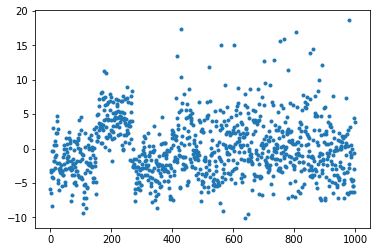

In [16]:
plt.plot(X[0],'.')

In [17]:
X[0]

array([-5.93388891e+00, -3.10464096e+00, -3.44311857e+00, -6.40000916e+00,
       -2.89760947e-01, -4.11093616e+00, -8.32917309e+00,  2.99859953e+00,
       -3.09012270e+00, -3.48890722e-01, -4.29995441e+00, -1.74835825e+00,
        4.54464465e-01, -1.83543921e+00, -1.25505769e+00, -2.79474378e+00,
        1.04051960e+00,  2.21522355e+00,  4.79773581e-01, -9.86843348e-01,
       -2.07187462e+00,  4.04366064e+00,  2.20907784e+00,  4.68057728e+00,
        2.85903096e+00, -5.06419849e+00, -4.52803230e+00, -2.11501741e+00,
       -3.00335455e+00, -5.99254417e+00, -3.14268494e+00, -3.24272871e+00,
       -2.78001308e+00, -3.37263966e+00, -3.58104515e+00, -3.21904230e+00,
       -2.39268303e+00, -3.24710369e+00, -3.28301668e+00, -5.51678705e+00,
       -3.88318110e+00, -1.23117590e+00, -3.82288790e+00, -2.30096102e+00,
        4.55145746e-01, -5.67674637e-02, -8.57872605e-01, -5.35633326e+00,
       -4.84919739e+00, -2.93111539e+00, -2.34476626e-02, -2.97068572e+00,
        1.54901695e+00, -

Comment: The argmax code will display the largest value from the data set of the images.

In [18]:
np.argmax(X[0])

981

In [19]:
labels[948]

'Granny Smith'

Comment: The following two codes below will arrange the top ten categries from the images shown.

In [20]:
top_ten = np.argsort(X[0])[::-1][0:10]

In [21]:
for i in top_ten:
    print(labels[i])

ballplayer, baseball player
baseball
soccer ball
rugby ball
racket, racquet
football helmet
horizontal bar, high bar
torch
tennis ball
balance beam, beam


Comment; Below are the categories for different kinds of fruit.

In [22]:
labels

{0: 'tench, Tinca tinca',
 1: 'goldfish, Carassius auratus',
 2: 'great white shark, white shark, man-eater, man-eating shark, Carcharodon carcharias',
 3: 'tiger shark, Galeocerdo cuvieri',
 4: 'hammerhead, hammerhead shark',
 5: 'electric ray, crampfish, numbfish, torpedo',
 6: 'stingray',
 7: 'cock',
 8: 'hen',
 9: 'ostrich, Struthio camelus',
 10: 'brambling, Fringilla montifringilla',
 11: 'goldfinch, Carduelis carduelis',
 12: 'house finch, linnet, Carpodacus mexicanus',
 13: 'junco, snowbird',
 14: 'indigo bunting, indigo finch, indigo bird, Passerina cyanea',
 15: 'robin, American robin, Turdus migratorius',
 16: 'bulbul',
 17: 'jay',
 18: 'magpie',
 19: 'chickadee',
 20: 'water ouzel, dipper',
 21: 'kite',
 22: 'bald eagle, American eagle, Haliaeetus leucocephalus',
 23: 'vulture',
 24: 'great grey owl, great gray owl, Strix nebulosa',
 25: 'European fire salamander, Salamandra salamandra',
 26: 'common newt, Triturus vulgaris',
 27: 'eft',
 28: 'spotted salamander, Ambystoma 

Comment: Below is the plotted information used to record the data for the categories above.

(array([ 21., 123., 267., 249., 189., 102.,  31.,   7.,   7.,   4.]),
 array([-10.082386,  -7.210017,  -4.337648,  -1.465279,   1.40709 ,
          4.279459,   7.151828,  10.024197,  12.896566,  15.768935,
         18.641304], dtype=float32),
 <a list of 10 Patch objects>)

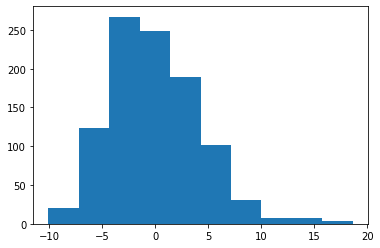

In [23]:
plt.hist(X[0])

Comment: The GPU will be used to calculate the values given from the lsit of vegetables in the array above.

In [24]:
X = GPU_data(X)
Y = GPU_data(Y)

Comment: The softmax will be used to identify the vegetables and calculate the data to add to one.

In [25]:
def softmax(x):
    s1 = torch.exp(x - torch.max(x,1)[0][:,None])
    s = s1 / s1.sum(1)[:,None]
    return s

In [26]:
def cross_entropy(outputs, labels):            
    return -torch.sum(softmax(outputs).log()[range(outputs.size()[0]), labels.long()])/outputs.size()[0]  

In [27]:
def randn_trunc(s): #Truncated Normal Random Numbers
    mu = 0 
    sigma = 0.1
    R = stats.truncnorm((-2*sigma - mu) / sigma, (2*sigma - mu) / sigma, loc=mu, scale=sigma)
    return R.rvs(s)

In [28]:
def Truncated_Normal(size):

    u1 = torch.rand(size)*(1-np.exp(-2)) + np.exp(-2)
    u2 = torch.rand(size)
    z  = torch.sqrt(-2*torch.log(u1)) * torch.cos(2*np.pi*u2)

    return z

In [29]:
def acc(out,y):
    with torch.no_grad():
        return (torch.sum(torch.max(out,1)[1] == y).item())/y.shape[0]

In [30]:
X.shape

torch.Size([50, 1000])

In [31]:
def get_batch(mode):
    b = c.b
    if mode == "train":
        r = np.random.randint(X.shape[0]-b) 
        x = X[r:r+b,:]
        y = Y[r:r+b]
    elif mode == "test":
        r = np.random.randint(X_test.shape[0]-b)
        x = X_test[r:r+b,:]
        y = Y_test[r:r+b]
    return x,y

In [32]:
def model(x,w):

    return x@w[0]

In [33]:
def make_plots():
    
    acc_train = acc(model(x,w),y)
    
    # xt,yt = get_batch('test')

    # acc_test = acc(model(xt,w),yt)

    wb.log({"acc_train": acc_train})

Comment: The code witht the link to the other tabs with the graph will run the given information from the images and make the best guess from calculating values from the given information.

In [34]:
wb.init(project="Linear_Model_Photo_1");
c = wb.config

c.h = 0.001
c.b = 32
c.epochs = 100000

w = [GPU(Truncated_Normal((1000,2)))]

optimizer = torch.optim.Adam(w, lr=c.h)  

for i in range(c.epochs):

    x,y = get_batch('train')

    loss = cross_entropy(softmax(model(x,w)),y)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
   
    wb.log({"loss": loss})

    make_plots()


<IPython.core.display.Javascript object>

wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


<ipython-input-2-4608b466ff03>:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return torch.tensor(data, requires_grad=True, dtype=torch.float, device=torch.device('cuda'))


https://tensorspace.org/

The best of all the three data came out to be 0.7508

The worst was 0.5938

The average came out to be 0.625